In [1]:
import gym
import matplotlib.pyplot as plt

from algorithm_analysis.lib import qlearning
# env = GridworldEnv()
from algorithm_analysis.lib.plotting import plot_episode_length_over_time, plot_episode_reward_over_time

In [2]:
env = gym.make('Taxi-v3')

Run q-learning with 500 states and 6 actions.
Run q-learning with 500 states and 6 actions.
Run q-learning with 500 states and 6 actions.
Run q-learning with 500 states and 6 actions.
Run q-learning with 500 states and 6 actions.
Run q-learning with 500 states and 6 actions.
Run q-learning with 500 states and 6 actions.
Run q-learning with 500 states and 6 actions.
Run q-learning with 500 states and 6 actions.


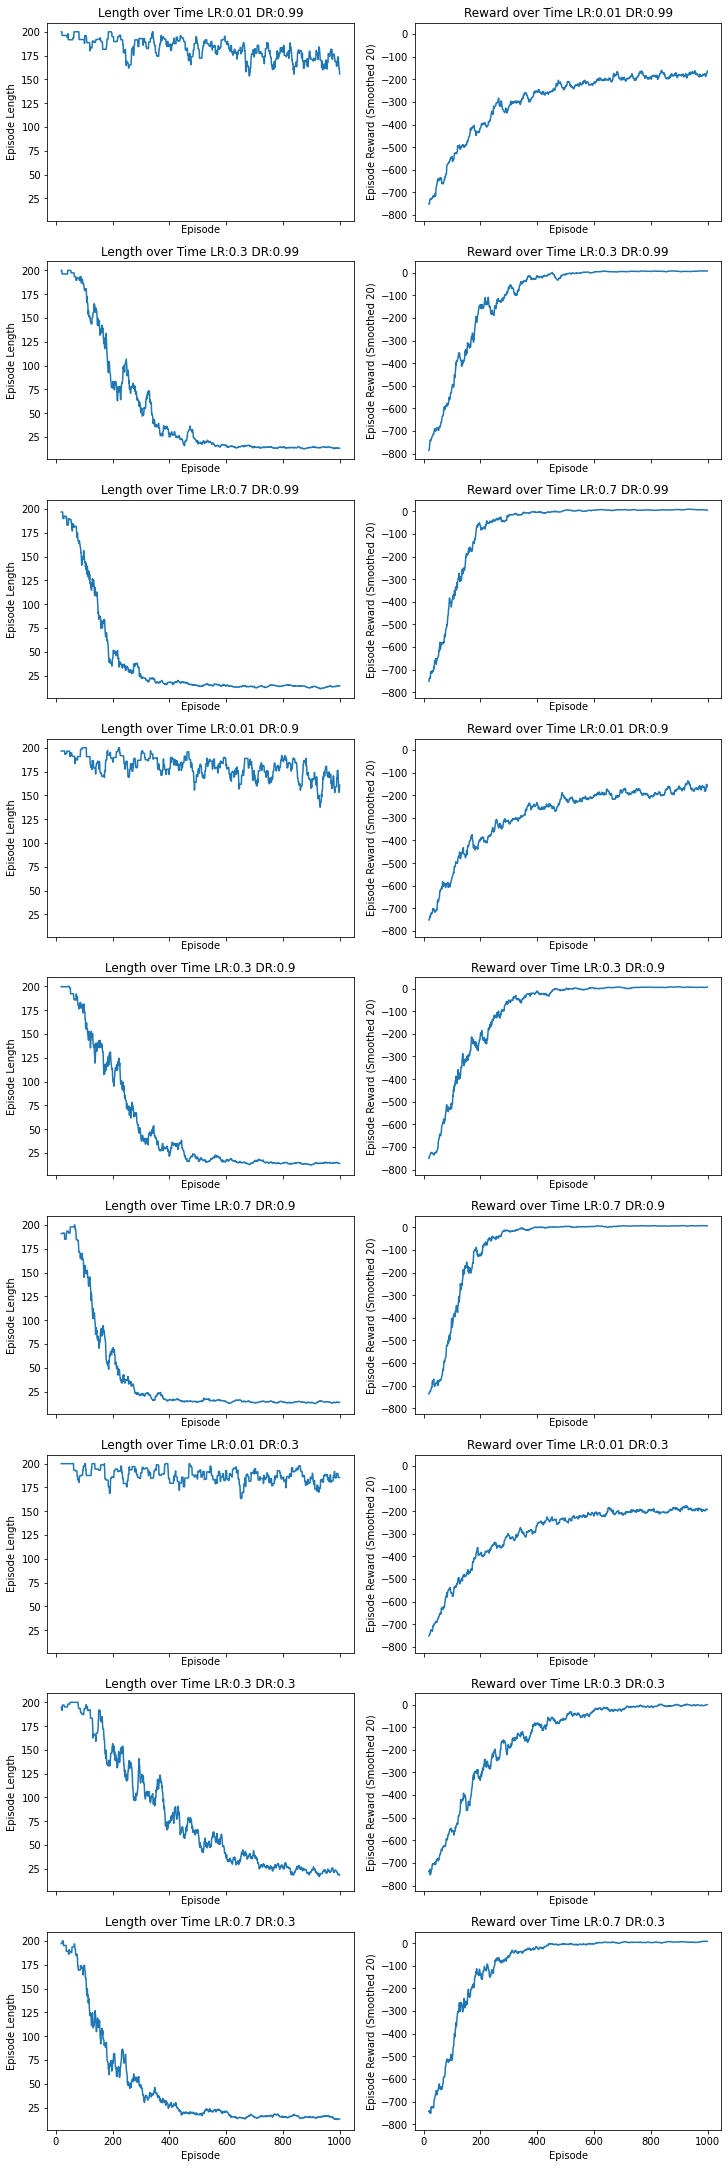

In [25]:
discount_rates = [0.99, 0.9, 0.3]
learning_rates = [0.01, 0.3, 0.7]
total_runs = len(discount_rates) * len(learning_rates)
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 30), constrained_layout=True, sharex=True, sharey='col')
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        metric = qlearning.run(env, episodes=1000,
                               learning_rate=learning_rate, discount_rate=discount_rate)
        ax_row = i * len(learning_rates) + j
        plot_episode_length_over_time(axs[ax_row, 0], metric, smoothing_window=20)
        plot_episode_reward_over_time(axs[ax_row, 1], metric, smoothing_window=20)
        

plt.show()